In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()    # It is a 163 mb data having 60000 rows

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

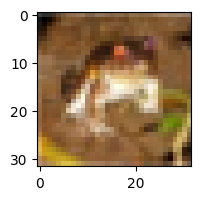

In [9]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
classes[9]

'truck'

In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

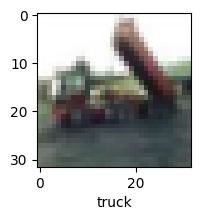

In [15]:
plot_sample(X_train,y_train,2)

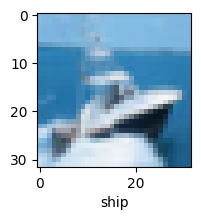

In [16]:
plot_sample(X_train,y_train,8)

# Normalize the dataset

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Lets crate a ANN model then we will go for CNN

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train,y_train, epochs=1

In [19]:
# We will not run the above ann models as it will consume lot of time
# the result of this ann model will be very bad
# Now we are going to use CNN to improve the performance 

# Building CNN Model

In [25]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #ann/dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5922 - accuracy: 0.7916
Epoch 2/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5643 - accuracy: 0.8028
Epoch 3/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5350 - accuracy: 0.8125
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5081 - accuracy: 0.8190
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4809 - accuracy: 0.8303
Epoch 6/20
1563/1563 [==============================] - 71s 46ms/step - loss: 0.4559 - accuracy: 0.8376
Epoch 7/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4339 - accuracy: 0.8437
Epoch 8/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4125 - accuracy: 0.8525
Epoch 9/20
1563/1563 [==============================] - 71s 45ms/step - loss: 0.3910 - accuracy: 0.8614
Epoch 10/20
1563/1563 [==============================] - 69s 44m

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 15ms/step - loss: 1.6905 - accuracy: 0.6739


[1.690531611442566, 0.6739000082015991]

In [30]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [31]:
y_test=y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [1]:
plot_sample(X_test,y_test,2)

NameError: name 'plot_sample' is not defined

In [33]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[5.23903036e-05, 2.25738361e-08, 7.69710141e-07, 9.72794354e-01,
        3.10250016e-06, 1.74154621e-02, 9.63737818e-08, 1.18147955e-06,
        9.72937234e-03, 3.29986756e-06],
       [1.05425686e-04, 3.13004875e-03, 1.10857851e-15, 4.54572143e-19,
        8.11129917e-18, 1.09441760e-24, 2.63355282e-19, 1.67722275e-26,
        9.96764421e-01, 1.76435350e-07],
       [5.01332544e-02, 1.03644779e-04, 8.96776058e-08, 2.97564231e-08,
        3.53931028e-07, 5.68734038e-09, 2.47049154e-08, 2.99468525e-06,
        9.48001027e-01, 1.75857940e-03],
       [9.97011304e-01, 1.03557774e-07, 2.40349816e-03, 1.49582920e-04,
        3.85342037e-06, 1.48509445e-08, 4.29049105e-04, 1.48014420e-10,
        2.59312810e-06, 2.33545041e-08],
       [6.81960185e-14, 1.35717800e-11, 1.30817271e-03, 8.79333747e-05,
        9.74063635e-01, 8.86590854e-08, 2.45401002e-02, 4.32645031e-11,
        4.30657394e-08, 4.64339027e-12]], dtype=float32)

In [34]:
np.argmax(y_pred[0])

3

In [35]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.74      0.70      1000
           1       0.80      0.79      0.80      1000
           2       0.55      0.58      0.57      1000
           3       0.54      0.41      0.47      1000
           4       0.63      0.60      0.61      1000
           5       0.51      0.65      0.57      1000
           6       0.76      0.72      0.74      1000
           7       0.76      0.68      0.72      1000
           8       0.77      0.80      0.78      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

